# Getting start

In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db


# Collections

In [3]:
df = pd.DataFrame(np.random.rand(60).reshape(10,6))
df

,0,1,2,3,4,5
0,0.149034,0.604988,0.070560,0.298244,0.455134,0.896560
1,0.854942,0.291555,0.686519,0.856187,0.559002,0.737303
2,0.333051,0.779722,0.075977,0.891700,0.577997,0.544064
3,0.032463,0.374616,0.252517,0.291193,0.669397,0.687053
4,0.607324,0.337583,0.270796,0.799909,0.810546,0.530320
5,0.683711,0.048430,0.268431,0.286249,0.526409,0.981537
6,0.903745,0.823235,0.883192,0.379180,0.031492,0.094687
7,0.893327,0.700813,0.876160,0.313225,0.318481,0.726146
8,0.939292,0.308199,0.041690,0.667480,0.076510,0.504596
9,0.153619,0.025283,0.544786,0.339783,0.459579,0.020543


In [12]:
df.to_csv("myDataFrame.csv", index=False)

In [15]:
df = pd.read_csv("myDataFrame.csv")
df

,0,1,2,3,4,5
0,0.149034,0.604988,0.070560,0.298244,0.455134,0.896560
1,0.854942,0.291555,0.686519,0.856187,0.559002,0.737303
2,0.333051,0.779722,0.075977,0.891700,0.577997,0.544064
3,0.032463,0.374616,0.252517,0.291193,0.669397,0.687053
4,0.607324,0.337583,0.270796,0.799909,0.810546,0.530320
5,0.683711,0.048430,0.268431,0.286249,0.526409,0.981537
6,0.903745,0.823235,0.883192,0.379180,0.031492,0.094687
7,0.893327,0.700813,0.876160,0.313225,0.318481,0.726146
8,0.939292,0.308199,0.041690,0.667480,0.076510,0.504596
9,0.153619,0.025283,0.544786,0.339783,0.459579,0.020543


In [18]:
ddf = dd.read_csv("myDataFrame.csv")
ddf

,0,1,2,3,4,5
npartitions=1,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...


In [19]:
ddf.compute()

,0,1,2,3,4,5
0,0.149034,0.604988,0.070560,0.298244,0.455134,0.896560
1,0.854942,0.291555,0.686519,0.856187,0.559002,0.737303
2,0.333051,0.779722,0.075977,0.891700,0.577997,0.544064
3,0.032463,0.374616,0.252517,0.291193,0.669397,0.687053
4,0.607324,0.337583,0.270796,0.799909,0.810546,0.530320
5,0.683711,0.048430,0.268431,0.286249,0.526409,0.981537
6,0.903745,0.823235,0.883192,0.379180,0.031492,0.094687
7,0.893327,0.700813,0.876160,0.313225,0.318481,0.726146
8,0.939292,0.308199,0.041690,0.667480,0.076510,0.504596
9,0.153619,0.025283,0.544786,0.339783,0.459579,0.020543


In [5]:
ddf = dd.from_pandas(df, npartitions=4)
ddf

,0,1,2,3,4,5
npartitions=3,,,,,,
0,float64,float64,float64,float64,float64,float64
3,...,...,...,...,...,...
6,...,...,...,...,...,...
9,...,...,...,...,...,...


In [6]:
ddf.divisions

(0, 3, 6, 9)

In [20]:
ddf.compute()

,0,1,2,3,4,5
0,0.149034,0.604988,0.070560,0.298244,0.455134,0.896560
1,0.854942,0.291555,0.686519,0.856187,0.559002,0.737303
2,0.333051,0.779722,0.075977,0.891700,0.577997,0.544064
3,0.032463,0.374616,0.252517,0.291193,0.669397,0.687053
4,0.607324,0.337583,0.270796,0.799909,0.810546,0.530320
5,0.683711,0.048430,0.268431,0.286249,0.526409,0.981537
6,0.903745,0.823235,0.883192,0.379180,0.031492,0.094687
7,0.893327,0.700813,0.876160,0.313225,0.318481,0.726146
8,0.939292,0.308199,0.041690,0.667480,0.076510,0.504596
9,0.153619,0.025283,0.544786,0.339783,0.459579,0.020543


In [44]:
narr = np.random.randint(0,10,100).reshape(10,10)
narr

array([[2, 7, 3, 1, 3, 8, 1, 9, 0, 0],
       [0, 8, 0, 6, 3, 7, 7, 3, 4, 5],
       [0, 1, 2, 8, 6, 4, 3, 8, 5, 6],
       [1, 8, 4, 7, 8, 2, 4, 5, 1, 8],
       [4, 6, 4, 5, 5, 7, 4, 3, 8, 2],
       [8, 5, 3, 3, 9, 4, 5, 4, 2, 5],
       [9, 3, 1, 4, 0, 9, 5, 6, 7, 3],
       [5, 7, 1, 4, 8, 2, 2, 9, 3, 2],
       [1, 7, 9, 4, 7, 8, 9, 7, 2, 0],
       [6, 4, 3, 0, 6, 6, 6, 6, 4, 3]])

In [45]:
darr = da.from_array(narr, chunks=(5, 5))
darr

dask.array<array, shape=(10, 10), dtype=int32, chunksize=(5, 5), chunktype=numpy.ndarray>

In [51]:
darr.compute()

array([[2, 7, 3, 1, 3, 8, 1, 9, 0, 0],
       [0, 8, 0, 6, 3, 7, 7, 3, 4, 5],
       [0, 1, 2, 8, 6, 4, 3, 8, 5, 6],
       [1, 8, 4, 7, 8, 2, 4, 5, 1, 8],
       [4, 6, 4, 5, 5, 7, 4, 3, 8, 2],
       [8, 5, 3, 3, 9, 4, 5, 4, 2, 5],
       [9, 3, 1, 4, 0, 9, 5, 6, 7, 3],
       [5, 7, 1, 4, 8, 2, 2, 9, 3, 2],
       [1, 7, 9, 4, 7, 8, 9, 7, 2, 0],
       [6, 4, 3, 0, 6, 6, 6, 6, 4, 3]])

# Methods


In [65]:
df['1'].mean()

0.42944239885994107

In [66]:
m = ddf['1'].mean()

In [67]:
m.compute()

0.42944239885994107

In [71]:
mm = np.mean(darr)

In [72]:
mm.compute()

4.52

In [75]:
mm.dask

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x179bead3160>
 0. array-5d717b017ea5b1f1658a0cb2885909ff
 1. mean_chunk-e53da53fee29184c1b1a2e1133944fe9
 2. mean_agg-aggregate-eadbf76740abf2b9acb4879e1b8b2bf9

# Task Graphs


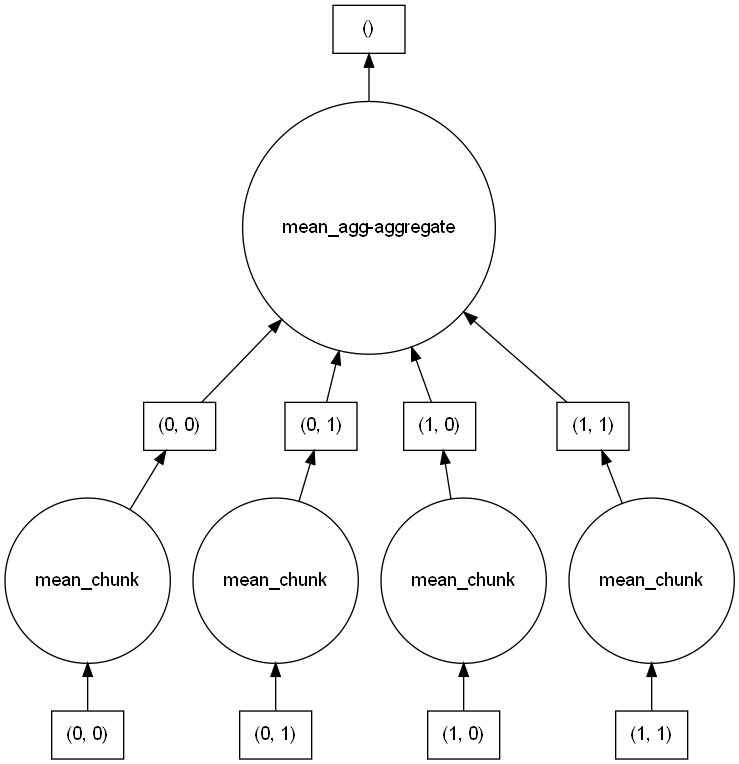

In [74]:
mm.visualize()


In [ ]:
ddf.a.dask
ddf.a.visualize()

# Interfaces

In [105]:
import dask

@dask.delayed
def doubled(x):
   return 2*x

In [109]:
doubled(darr)

Delayed('doubled-5f08d4cc-aaeb-43bb-9577-7c8f055af1fd')

In [106]:
d = doubled(darr)

In [107]:
d.compute()

array([[ 4, 14,  6,  2,  6, 16,  2, 18,  0,  0],
       [ 0, 16,  0, 12,  6, 14, 14,  6,  8, 10],
       [ 0,  2,  4, 16, 12,  8,  6, 16, 10, 12],
       [ 2, 16,  8, 14, 16,  4,  8, 10,  2, 16],
       [ 8, 12,  8, 10, 10, 14,  8,  6, 16,  4],
       [16, 10,  6,  6, 18,  8, 10,  8,  4, 10],
       [18,  6,  2,  8,  0, 18, 10, 12, 14,  6],
       [10, 14,  2,  8, 16,  4,  4, 18,  6,  4],
       [ 2, 14, 18,  8, 14, 16, 18, 14,  4,  0],
       [12,  8,  6,  0, 12, 12, 12, 12,  8,  6]])

In [92]:
@dask.delayed
def foo(x):
    return round(x*10)
  

In [93]:
f = foo(ddf['1'])

In [94]:
f.compute()

0    6.0
1    3.0
2    8.0
3    4.0
4    3.0
5    0.0
6    8.0
7    7.0
8    3.0
9    0.0
Name: 1, dtype: float64

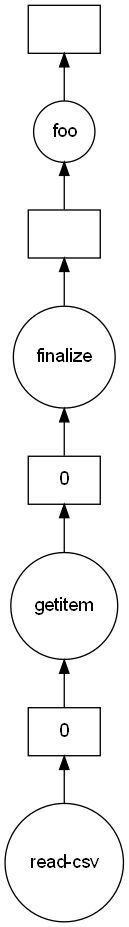

In [95]:
f.visualize()

In [ ]:
from dask.distributed import Client

client = Client()

def inc(x):
   return x + 1

def add(x, y):
   return x + y

a = client.submit(inc, 1)     # work starts immediately
b = client.submit(inc, 2)     # work starts immediately
c = client.submit(add, a, b)  # work starts immediately

c = c.result()                # block until work finishes, then gather result
c

# Diagnostics

In [ ]:
client.dashboard_link

# Esempio

In [36]:
#CSV Dataset Russell Stock History
import pandas as pd
df = pd.read_csv('Prices.csv')

In [37]:
df

,Unnamed: 0,symbol,date,open,high,low,close,volume,adjusted
0,1,FLWS,1999-08-03,21.7500,22.2500,17.875,18.1875,9543400.0,18.1875
1,2,FLWS,1999-08-04,18.9375,20.5000,16.875,17.0000,4731800.0,17.0000
2,3,FLWS,1999-08-05,17.0625,17.1250,13.500,16.0000,2851900.0,16.0000
3,4,FLWS,1999-08-06,16.0000,17.7500,16.000,17.0000,1411800.0,17.0000
4,5,FLWS,1999-08-09,17.9375,17.9375,15.875,16.0000,583000.0,16.0000
...,...,...,...,...,...,...,...,...,...
12995440,12995441,ZUMZ,2022-11-07,22.4100,22.8800,22.020,22.6700,172900.0,22.6700
12995441,12995442,ZUMZ,2022-11-08,22.8700,23.3600,22.220,22.4700,311800.0,22.4700
12995442,12995443,ZUMZ,2022-11-09,22.3600,22.4300,20.640,20.7800,239800.0,20.7800
12995443,12995444,ZUMZ,2022-11-10,21.8300,23.6900,21.780,23.5100,327600.0,23.5100


In [38]:
df.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adjusted
0,1,FLWS,1999-08-03,21.7500,22.2500,17.875,18.1875,9543400.0,18.1875
1,2,FLWS,1999-08-04,18.9375,20.5000,16.875,17.0000,4731800.0,17.0000
2,3,FLWS,1999-08-05,17.0625,17.1250,13.500,16.0000,2851900.0,16.0000
3,4,FLWS,1999-08-06,16.0000,17.7500,16.000,17.0000,1411800.0,17.0000
4,5,FLWS,1999-08-09,17.9375,17.9375,15.875,16.0000,583000.0,16.0000


In [39]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12995445 entries, 0 to 12995444
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   symbol      object 
 2   date        object 
 3   open        float64
 4   high        float64
 5   low         float64
 6   close       float64
 7   volume      float64
 8   adjusted    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.2 GB


In [82]:
def sub(x, y):
   return x - y

In [78]:
%%time
sub(df['open'],df['close'])

CPU times: total: 15.6 ms
Wall time: 28.5 ms


0           3.5625
1           1.9375
2           1.0625
3          -1.0000
4           1.9375
             ...  
12995440   -0.2600
12995441    0.4000
12995442    1.5800
12995443   -1.6800
12995444   -0.5100
Length: 12995445, dtype: float64

In [ ]:
#%timeit df.groupby('symbol').volume.mean()
df.groupby('symbol').volume.mean()

In [79]:
import dask.dataframe as dd
ddf = dd.read_csv('Prices.csv', dtype={'volume': 'float64'})

In [83]:
import dask

@dask.delayed
def sub(x, y):
   return x - y

In [85]:
c = sub(ddf['open'],ddf['close'])

In [86]:
%%time

c.compute()

CPU times: total: 4.67 s
Wall time: 4.79 s


0         3.5625
1         1.9375
2         1.0625
3        -1.0000
4         1.9375
           ...  
991985   -0.2600
991986    0.4000
991987    1.5800
991988   -1.6800
991989   -0.5100
Length: 12995445, dtype: float64

In [11]:
mean = ddf.groupby('symbol').volume.mean()

In [12]:
%timeit mean.compute()

7.36 s ± 389 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
ddf2 = dd.read_csv('Prices.csv', dtype={'volume': 'float64'}, blocksize=120e6)
mean2 = ddf.groupby('symbol').volume.mean()

In [17]:
%timeit mean2.compute()

6.41 s ± 508 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


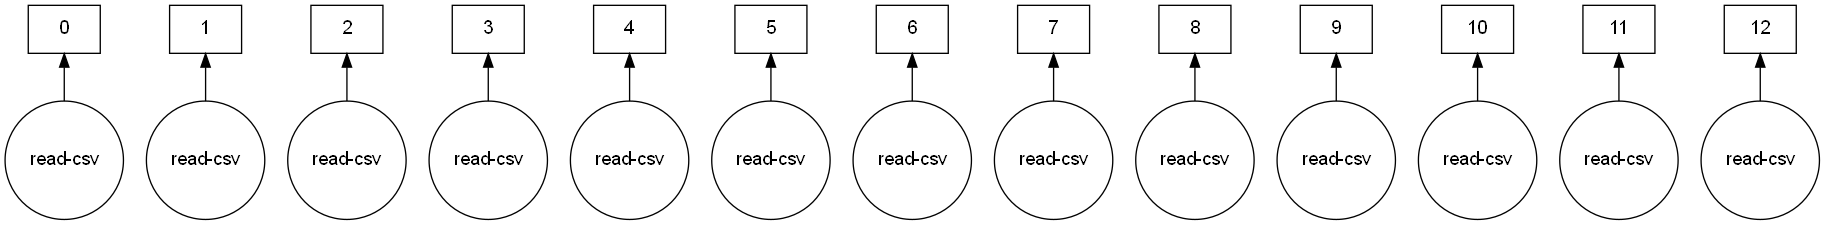

In [18]:
ddf.dask
ddf.visualize()

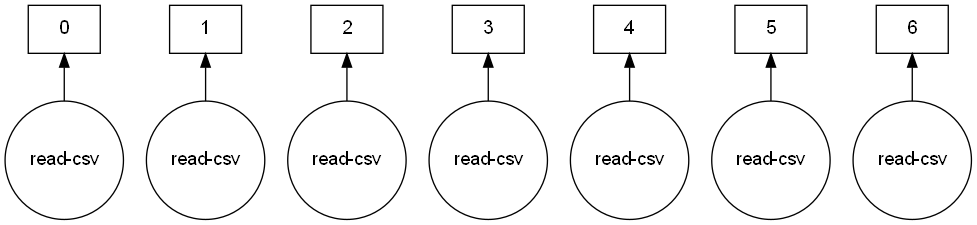

In [19]:
ddf2.dask
ddf2.visualize()

In [ ]:
sdf = pd.concat([df, df, df, df])

In [ ]:
sdf


In [ ]:
%timeit sdf.groupby('symbol').volume.mean()


In [34]:
sddf = dd.from_pandas(sdf, npartitions=8)

In [35]:
mean3 = ddf.groupby('symbol').volume.mean()

In [36]:
%timeit mean3.compute()

6.02 s ± 264 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.info(memory_usage="deep")